# Семинар 5. Метод опорных векторов. Калибровка вероятностей.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Сгенерируем данные для задачи классификации

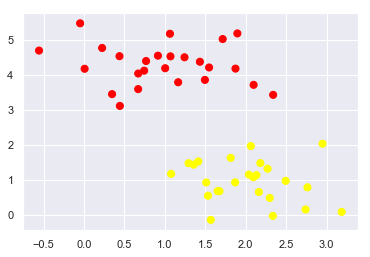

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

В случае линейно разделимой выборки существует бесконечно много классификаторов, решающих задачу без ошибок. Нарисуем несколько разделяющих поверхностей.

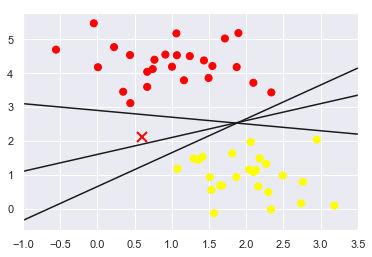

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Нарисуем разделяющие поверхности вместе с разделяющими полосами.

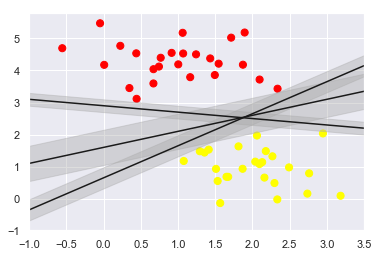

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Цель метода опорных векторов (support vector machine, SVM) - максимизировать ширину разделяющей полосы. Обучим SVM.

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Создадим функцию для визуализации метода.

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

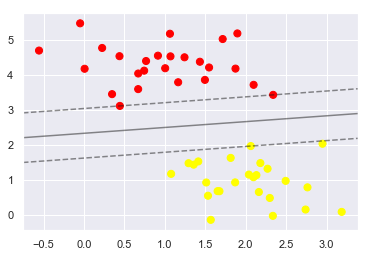

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Для SVM важны только позиции опорных векторов!

Например, обучим метод на первых 60 точках, а затем на первых 120 точках.

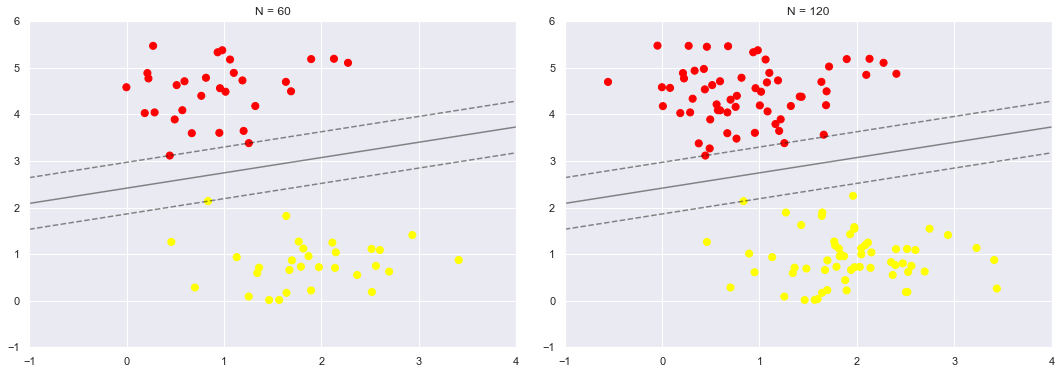

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Интерактивная визуализация SVM

In [12]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 100, 200, 1000], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 200, 1000), value=10), Output()), _dom_c…

## Неразделимый случай

С помощью функции make_blobs сгенерируйте выборку из 100 элементоа для задачи двухклассовой классификации с частично пересекающимися классами.

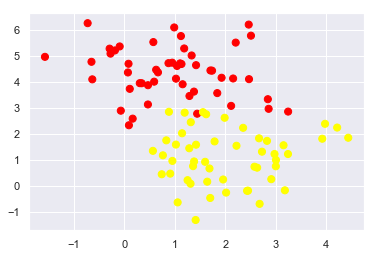

In [120]:
#your code here

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Посмотрим на результат работы SVM при различных C на этих данных.

Обучите SVC с линейным ядром (kernel='linear') и значением параметра C равным C (переменная в цикле) на этих данных.

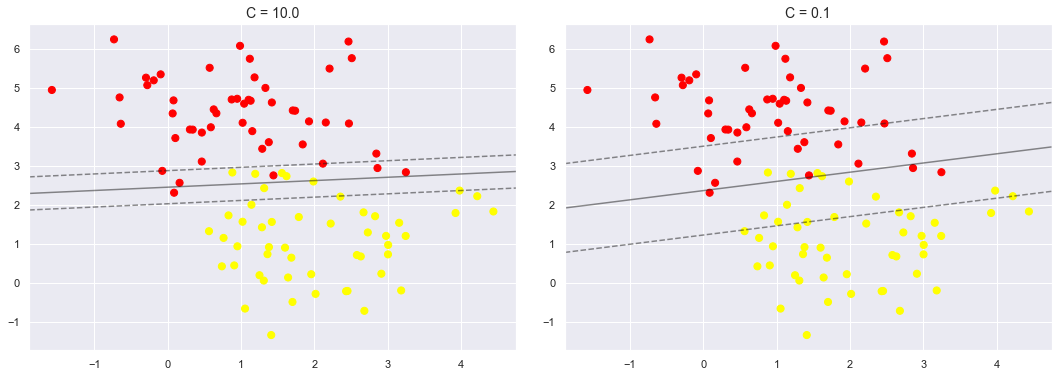

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):

    #your code here
    
    model = SVC(kernel='linear', C=C).fit(X, y)
        
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Задача распознавания лиц

Решим задачу классификации лиц (задача многоклассовой классификации) с помощью метода опорных векторов.

In [16]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Нарисуем несколько лиц из датасета

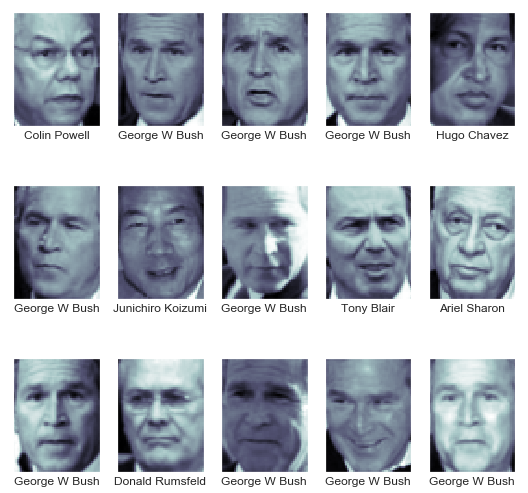

In [103]:
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Каждое изображение имеет размер [62×47] - это примерно 3000 пикселей. Мы можем использовать пиксели как признаки, но давайте понизим размерность пространства признаков.

Извлечем 150 самых информативных признаков из данных фотографий методом RandomizedPCA (разберем чуть позже).

In [147]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

Попробуем решить задачу алгоритмом SVM.

In [148]:
svc = SVC(kernel='linear', class_weight='balanced')

model = make_pipeline(pca, svc)

In [149]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [150]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 9.39 s
{'svc__C': 1}


In [151]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

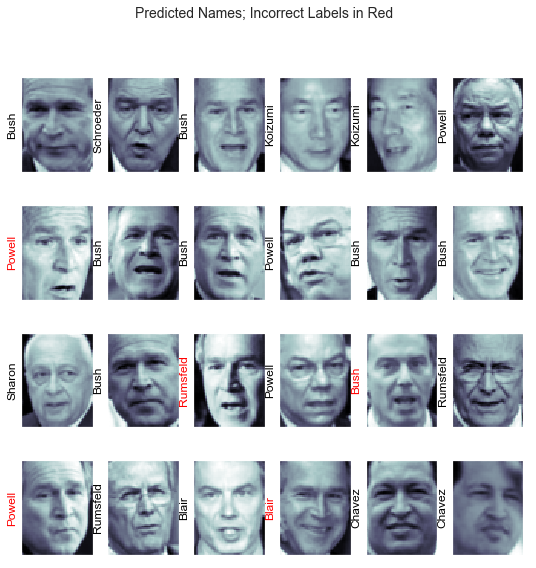

In [152]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Выведем на экран метрики классификации.

In [153]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.67      0.65        15
     Colin Powell       0.74      0.84      0.79        68
  Donald Rumsfeld       0.74      0.81      0.77        31
    George W Bush       0.85      0.79      0.82       126
Gerhard Schroeder       0.75      0.78      0.77        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      0.92      0.92        12
       Tony Blair       0.81      0.83      0.82        42

        micro avg       0.80      0.80      0.80       337
        macro avg       0.80      0.79      0.79       337
     weighted avg       0.80      0.80      0.80       337



Нарисуем матрицу ошибок классификатора.

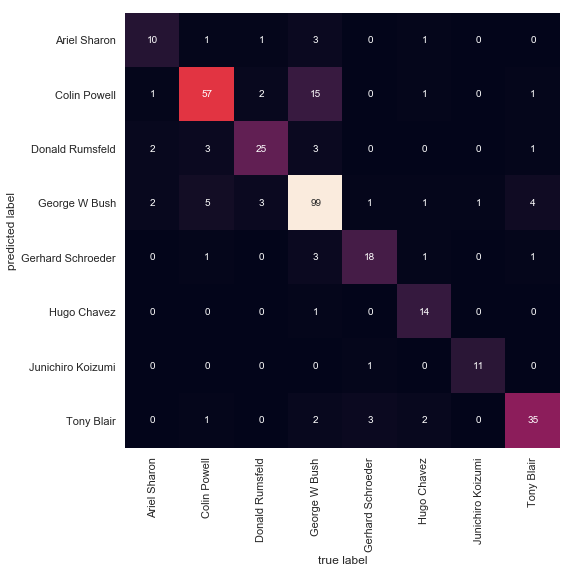

In [154]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

0.798219584569733

## Решение нелинейных задач с помощью SVM

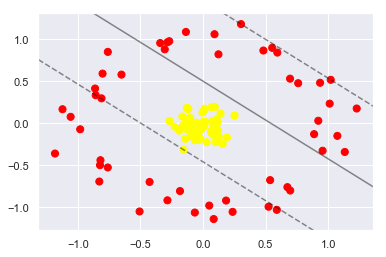

In [124]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Перейдем в пространство новой (большей) размерности. В данном примере в качестве третьей координаты можно использовать радиальную фунцию:

In [125]:
r = np.exp(-(X ** 2).sum(1))

In [126]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, -45, 0, 45, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, -45, 0, 45, 90), value=-90), IntSlider(value=…

Видим, что в новом пространстве выборка стала линейно разделимой.

Решение исходной задачи в новом пространстве с помощью SVM называется ядровым SVM (Kernel SVM).

In [127]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

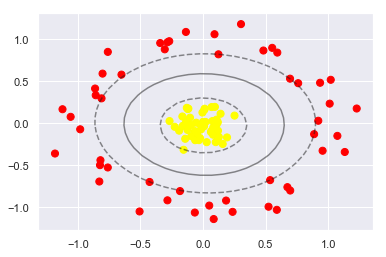

In [128]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации. 

SVM с каким ядром дал лучший результат?

In [115]:
#your code here

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced').

Какое качество показала эта модель?

In [116]:
#your code here

### Задание 3.

Сгенерируйте 100 точек для задачи двухклассовой классификации с помощью датасета make_moons https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html.

Используйте параметр noise=0.1.

Подберите тип ядра в методе SVM и значение параметра C, чтобы добиться (визуально) безошибочной классификации.

In [142]:
from sklearn.datasets.samples_generator import make_moons

#your code here

# Калибровка вероятностей

https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


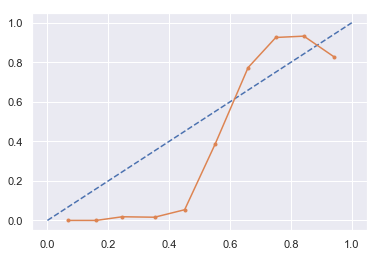

In [143]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

model = SVC()
model.fit(trainX, trainy)

probs = model.decision_function(testX)

fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)

pyplot.plot([0, 1], [0, 1], linestyle='--')

pyplot.plot(mpv, fop, marker='.')
pyplot.show()

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

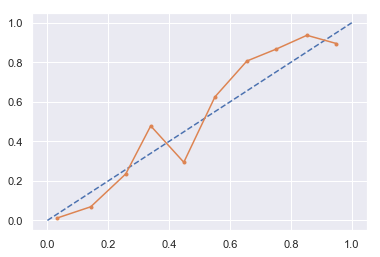

In [145]:
from sklearn.calibration import CalibratedClassifierCV

model = SVC()
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(trainX, trainy)

probs = calibrated.predict_proba(testX)[:, 1]

fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)

pyplot.plot([0, 1], [0, 1], linestyle='--')

pyplot.plot(mpv, fop, marker='.')
pyplot.show()

### Задание 4.

Заново решите задачу классификации точек, сгенерированных с помощью метода make_circles.

1) Разбейте данные на train и test. Обучите SVM на train и сделайте предсказание вероятностей на test.
Нарисуйте calibration_curve.

2) Затем откалибруйте предсказания классификатора и нарисуйте полученную calibration curve.

In [167]:
#your code here